# Data Analytics Capstone


### 1. Introduction
*   **Project Overview**: The primary research question addressed by this capstone project is: "Between Vanguard’s Large-Cap ETF (VV) and Small-Cap ETF (VB), which asset class yields a superior profit margin and risk-adjusted return over a five-year investment horizon (2020–2025)?".

This project addresses a critical organizational need for data-driven investment frameworks tailored for inexperienced individual investors. In an era of market volatility and conflicting financial theories such as the Fama-French Three-Factor Model, which historically suggests a "small-cap premium", there is a significant need for analysis that replaces anecdotal evidence with quantitative facts. This study provides a clear, evidence-based recommendation to help stakeholders optimize capital allocation based on recent historical performance.

* Hypothesis: Large-Cap ETF will outperform Small-cap ETF.



#### Scope of the Project

The Scope of this analysis is strictly defined by the following parameters:

* Timeframe: Jan 1st 2020 - Dec 25th 2025
* Assets Vanguard Large-Cap ETF (VV) & Vanguard Small-Cap ETF (VB)
* KPIs: The project focuses on 2 primary metrics: Cumulative Return (ROI) and Annualized Volatility (Standard Deviation).

**Data Source**: Data will be pulled from Alpha Vantage API

#### Methodology: CRISP-DM

The project was executed using the CRISP-DM methodology. This provides a structured, professional framework for data-driven projects:

* **Business/Research Understanding**: Defining the goal to compare Large-Cap vs Small-Cap ETF performance for inexperienced investors.
* **Data Understanding**: Identifying the Alpha Vantage API as the primary source for historical stock data.
* **Data Preparation**: Cleaning the JSON response, converting data types to float, and filtering the data range from 2020 to 2025.
* **Analysis**: Calculating the key metrics: Total ROI and Annualized Volatility.
* **Evaluation**: Comparing the results against a 2% practical significance threshold to make a final recommendation.
* **Deployment**: Visualizing the findings in Jupyter Notebook for stakeholders.

### 2. Setup
**Required Libraries:**
* requests
* pandas
* matplotlib
* seaborn
* time

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

### 3. Data Understanding and Extraction

**In this section, we will pull data using Alpha Vantage's API. We will also inspect and evaluate the data.**

 *my API key will not be hardcoded within this notebook so if you want to recreate this notebook you will have to put in your own key*

In [33]:
API_KEY = '################'
Large_Cap_Ticker = 'VV' # This is the official ticker symbol for Vanguards Large-Cap ETF
Small_Cap_Ticker = 'VB' # This is the official ticker symbol for Vanguards Small-Cap ETF

In [4]:
# Lets create a method to pull the API Data
def get_etf_data(symbol):
  """Extracts 5 years of weekly data from Alpha Vantage"""
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}&apikey={API_KEY}'
  response = requests.get(url)
  data = response.json()

  # We will now Parse JSON to Pandas Dataframe
  df = pd.DataFrame.from_dict(data['Weekly Time Series'], orient='index')
  df.index = pd.to_datetime(df.index)
  # converting dataframe to float
  df = df.astype(float)
  df = df.sort_index().loc['2020-01-01' : '2025-12-25']
  # We are only looking at the closing price of each ETF so doing this is more efficient
  return df['4. close']

In [5]:
# Lets start fetching our data
print('Fetching Large-Cap Data...')
large_cap_prices = get_etf_data(Large_Cap_Ticker)
time.sleep(15)
print('Fetching Small-Cap Data...')
small_cap_prices = get_etf_data(Small_Cap_Ticker)

Fetching Large-Cap Data...
Fetching Small-Cap Data...


In [6]:
# Lets confirm that the API data pulled successfully
large_cap_prices.head()

,4. close
2020-01-03,148.12
2020-01-10,149.70
2020-01-17,152.64
2020-01-24,151.25
2020-01-31,148.23


In [7]:
large_cap_prices.tail()

,4. close
2025-11-21,304.11
2025-11-28,315.70
2025-12-05,316.71
2025-12-12,314.75
2025-12-19,315.01


In [8]:
small_cap_prices.head()

,4. close
2020-01-03,165.33
2020-01-10,165.54
2020-01-17,169.41
2020-01-24,166.58
2020-01-31,162.30


In [9]:
small_cap_prices.tail()

,4. close
2025-11-21,247.26
2025-11-28,258.75
2025-12-05,260.19
2025-12-12,262.61
2025-12-19,262.24


In [10]:
large_cap_prices.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 312 entries, 2020-01-03 to 2025-12-19
Series name: 4. close
Non-Null Count  Dtype  
--------------  -----  
312 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [11]:
small_cap_prices.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 312 entries, 2020-01-03 to 2025-12-19
Series name: 4. close
Non-Null Count  Dtype  
--------------  -----  
312 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [12]:
# Lets check if there are any null values within our dataset
print('Null values in large_cap_prices:')
display(large_cap_prices.isnull().sum())

print('\nNull values in small_cap_prices:')
display(small_cap_prices.isnull().sum())

Null values in large_cap_prices:


np.int64(0)


Null values in small_cap_prices:


np.int64(0)

### 4. Statistical Analysis
Luckily the data that Alpha Vantage provides is very clean so I do not have to do too much cleaning. This allows me to do more of the fun stuff!

In this section I will calcualte my primary KPIs.

I will be calculating the cumulative return (ROI) and the annualized volatility (Standard Deviation).

In [13]:
# Let's combine the dataframe for an easier analysis and visualization in the later stages
data = pd.DataFrame({'Large_Cap_Prices': large_cap_prices, 'Small_Cap_Prices': small_cap_prices})
data.head()

,Large_Cap_Prices,Small_Cap_Prices
2020-01-03,148.12,165.33
2020-01-10,149.70,165.54
2020-01-17,152.64,169.41
2020-01-24,151.25,166.58
2020-01-31,148.23,162.30


In [14]:
# Now let's calculate Weekly Percentage Changes
weekly_returns = data.pct_change()
weekly_returns.head()

,Large_Cap_Prices,Small_Cap_Prices
2020-01-03,NaN,NaN
2020-01-10,0.010667,0.001270
2020-01-17,0.019639,0.023378
2020-01-24,-0.009106,-0.016705
2020-01-31,-0.019967,-0.025693


In [15]:
# Next we can calculate cumulative return (ROI)
cumulative_returns = (1 + weekly_returns).cumprod() - 1
final_roi = cumulative_returns.iloc[-1] * 100
final_roi

,2025-12-19
Large_Cap_Prices,112.672158
Small_Cap_Prices,58.616101


In [16]:
# Finally lets calculate the Annualized Volatility(Standard Deviation) for our Weekly Data
annualized_volatility = weekly_returns.std() * (52 ** 0.5) # 52 b/c we are using weekly data points
annualized_volatility

,0
Large_Cap_Prices,0.198704
Small_Cap_Prices,0.250322


In [17]:
# Let's combine all of our KPIs into one condensed dataframe
metrics = pd.DataFrame({'Final_ROI': final_roi, 'Annualized_Volatility': annualized_volatility})
metrics

,Final_ROI,Annualized_Volatility
Large_Cap_Prices,112.672158,0.198704
Small_Cap_Prices,58.616101,0.250322


#### Understanding the KPIs:

**ROI**: Our ROI number represents our raw percentage profit an investor would have earned over the 5-year timeframe. A high ROi indicates the success of an ETF. In our case Vanguard's Large_Cap ETFs has beaten out Small-Cap ETF in terms of raw profits.

**Annualized_Volatility**: This is also our Standard Deviation. This measures the price fluctuations and in a sense tells us how "bumpy" the ride was for the investor. We want to minimize this number for a safe investment strategy. In our case Vanguard's Large-Cap ETF has also beaten out the Small-Cap ETF.

### 5. Visualizations

In this section I will create 3 visualizations:

* A Line Chart to indicate the growth of a $10,000 investment over 5 years.
* A Box Plot to show volatility and outliers
* A Bar Chart to compare the final 5-year ROI of both the ETFs

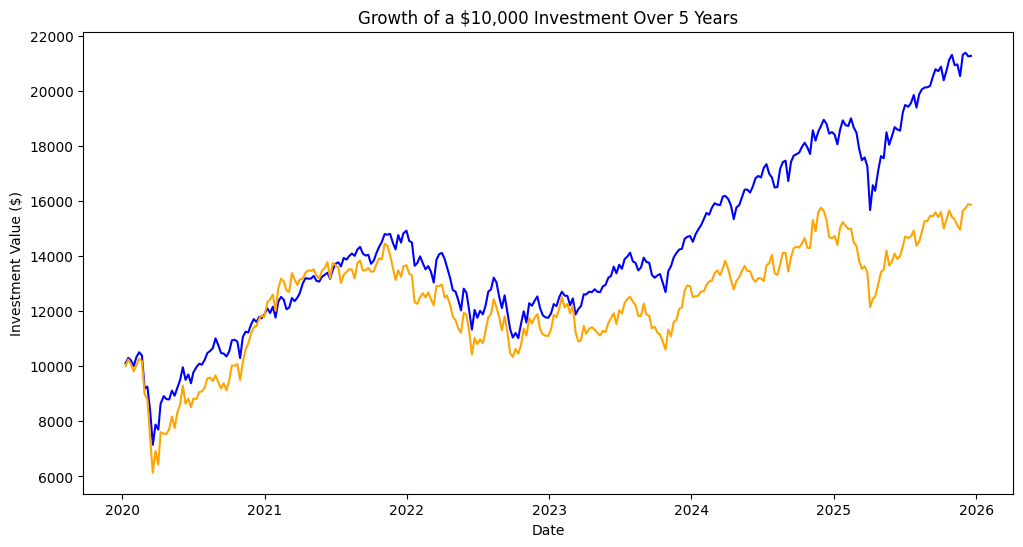

In [30]:
# Line Chart showing growth of a $10,000 Investment over 5 years

investment_growth = 10000 * (1 + cumulative_returns)

plt.figure(figsize=(12, 6))
plt.plot(investment_growth['Large_Cap_Prices'], label='Vanguard Large-Cap (VV)', color='blue')
plt.plot(investment_growth['Small_Cap_Prices'], label='Vanguard Small-Cap (VB)', color='orange')
plt.title('Growth of a $10,000 Investment Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)');

*The Line Chart was selected to visually emphasize the difference in wealth accumulation, making the 54% ROI difference digestable for an inexperiened investor.*

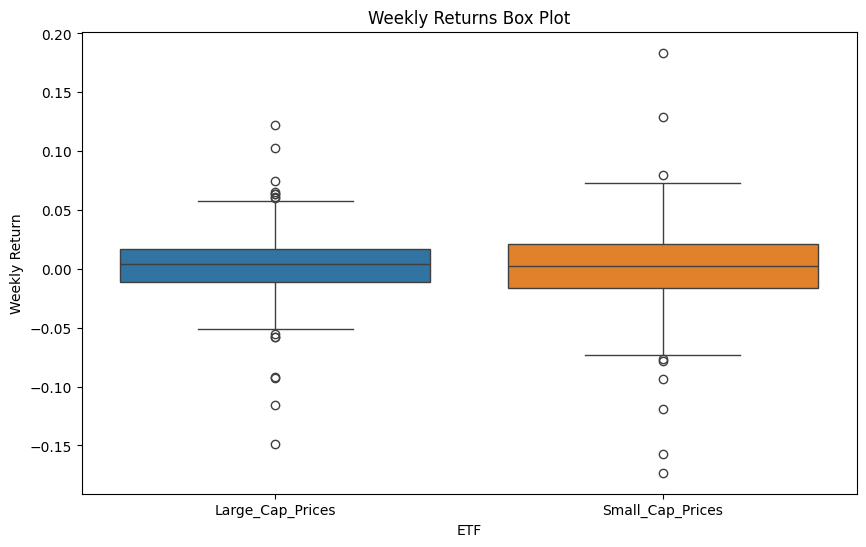

In [31]:
# Boxplot indicating volatility

plt.figure(figsize=(10, 6))
sns.boxplot(data=weekly_returns)
plt.title('Weekly Returns Box Plot')
plt.xlabel('ETF')
plt.ylabel('Weekly Return');

*The Box Plot here effectively highlights the "spread" of risk by showing wider whiskers for the Small-Cap ETF. It tells the story of a "bumpier ride" that a simple average number cannot convey.*

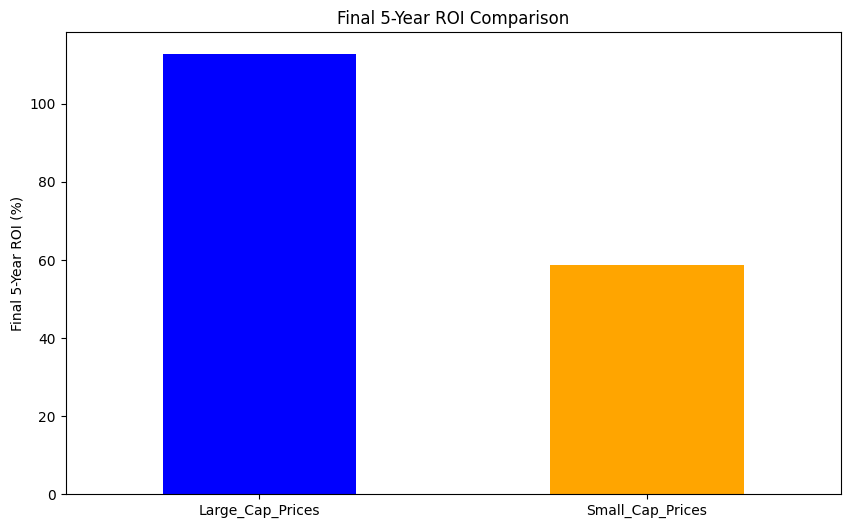

In [32]:
# Bar Chart comparing a 5 - year ROI percentage

plt.figure(figsize=(10, 6))
metrics['Final_ROI'].plot(kind='bar', color=['blue', 'orange'])
plt.title('Final 5-Year ROI Comparison')
plt.ylabel('Final 5-Year ROI (%)')
plt.xticks(rotation=0);

*The Bar Chart serves as a clear visual summary of the Total 5-Year ROI percentage for both the Large-Cap and Small-Cap ETFs.*

### 6. Evaluation and Conclusion
**Issues**

While the original plan intended to use daily data, I encountered API rate limits (5 calls per minute) and parameter restrictions on the free tier. To resolve this, I transitioned to the Weekly Time Series endpoint. This allowed for 5 years of historical data while staying within governance guidelines. A limitation of this approach is slightly lower granularity in volatility, but an advantage is a 'smoother' ROI calculation that filters out daily market noise.

#### **Hypothesis Evaluation**

The results of this analysis support the initial hypothesis: Large-cap ETFs yeilded a significantly higher ROI over the 5-year period compared to the Small-cap ETF.

* Large-Cap (VV) ROI: 112.67%
* Small-Cap (VB) ROI: 58.62%

This Finding contradicts the Fama French Three Factor Model AND the Vanguard Capital Markets Model cited in the project proposal, which suggested that Small-Caps would likely outperform due to their higher risk profile. In the specific window of 2020-2025, the market heavily favored Large-Cap stability and growth over the Small-Cap ETF.

* Risk-Reward trade-off: Large-Cap (VV) not only provided nearly double the profit, but did so with a lower annualized volatility.

* ROI Difference: The performance gap is 54.05%, which vastly exceeds the 2% threshold we set in task 2.

#### **Final Recommendation**
For an investor with a 5-year horizon starting in 2020, the **Vanguard Large-Cap ETF (VV)** was the superior asset class. It provided a "Golden Ticket" scenario with higher returns and a smoother ride (lower risk). While historical data does not guarantee future results, this analysis provides an empirical framework that replaces anecdotal bias with actionable intelligence for the target audience.